## 1. Supervised Learning in the Ising Model
This question is based on our in-class tutorial which focused on generating the first figure in J.
Carrasquilla and R. G. Melko, Nat. Phys. 13, 431 (2017). https://arxiv.org/abs/1605.01735

Using the Monte Carlo code we wrote in class, I generated 16000 2D Ising spin configurations with
L = 30 (Ising2D_config_L30.dat.gz), labelled them with 1 = T > Tc, 0 = T < Tc,
(Ising2D\_labels\_L30.dat) and stored the temperatures at which the configurations were generated
(Ising2D\_temps\_L30.dat). These are available in the course repository in the data
folder.
### Part a 
Create a randomized train/validate/test split from the data and encode the labels as 1-hot
vectors. Until now we have only used a single split for training and testing. When we want
to evaluate a network after tuning hyperparamters it is considered best-practice to keep a
subset of data that the network never sees until final testing. This provides a fully unbiased
estimate of generalization and accuracy. While there are no absolute rules, 80/10/10 is
common.
### Part b
Train a neural network (architecture of your choice) until the accuracy converges. Plot both
the accuracy and cost as function of training epoch. Make sure to discuss any possible evidence
of overfitting.
### Part c
Study the effects of adjusting hyperparamters. You can consider: Training algorithm (stochastic
gradient descent, adam, . . . ), number of layers, number of neurons, DNN, CNN, etc. Make
sure to record the training log for each of these changes.
### Part d
Check your final accuracy using the test data set. Make sure to clearly display your final
accuracy.
### Part e
Study your network’s performance as a function of temperature. Make a plot of the:

i. average accuracy as a function of temperature,

ii. average output from each of the two output neurons (soft-max) as a function of temperature.
    
Compare your results with Figure 1 of the Carrasquilla and Melko reference. Hint: look into np.unique() to simplify your code.

In [3]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
x = np.loadtxt('data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('data/Ising2D_labels_L30.dat')
Tval = np.loadtxt('data/Ising2D_temps_L30.dat')

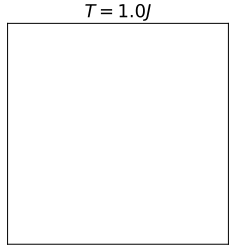

In [5]:
from IPython.display import clear_output,display
from time import sleep

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))

L = 30
for i,cx in enumerate(x[::50]):

    clear_output(wait=True)
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
    img = ax.matshow(cx.reshape(L,L), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'$T = {Tval[50*i]:.1f}J$')
    plt.pause(0.01)

    plt.show()

In [6]:
x_train,x_tmp,y_train,y_tmp=train_test_split(x,y,test_size=0.2)
x_valid,x_test,y_valid,y_test= train_test_split(x_tmp,y_tmp,test_size=0.5)

y_train_hot=keras.utils.to_categorical(y_train,2)
y_valid_hot=keras.utils.to_categorical(y_valid,2)
y_test_hot=keras.utils.to_categorical(y_test,2)

In [7]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                9010      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 84        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 9,324
Trainable params: 9,324
Non-trainable params: 0
_________________________________________________________________


In [8]:
#training
batch_size=64
epochs=10

training_history={}
training_history['10-20-4_DNN_adam']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.5713 - accuracy: 0.7527 - val_loss: 0.0765 - val_accuracy: 0.9769
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0461 - val_accuracy: 0.9819
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0376 - val_accuracy: 0.9850
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0314 - val_accuracy: 0.9906
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0237 - val_accuracy: 0.9931
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0254 - val_accuracy: 0.9925
Epoch 

Text(0.5, 0.95, '0.99')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica Neue
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica Neue


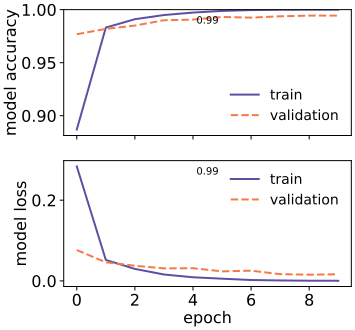

In [9]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['10-20-4_DNN_adam'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['10-20-4_DNN_adam'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['10-20-4_DNN_adam'].history['loss'], color=colors[0])
ax[1].plot(training_history['10-20-4_DNN_adam'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                9010      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
Total params: 9,494
Trainable params: 9,494
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.7525 - val_loss: 0.0578

Text(0.5, 0.95, '0.99')

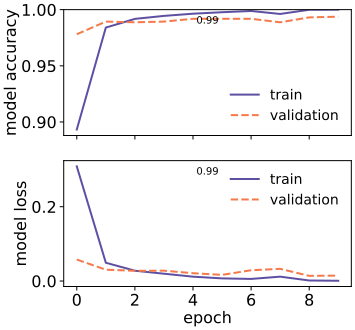

In [10]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#training
batch_size=64
epochs=10

training_history={}
training_history['10-20-10-4_DNN_adam']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['10-20-10-4_DNN_adam'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['10-20-10-4_DNN_adam'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['10-20-10-4_DNN_adam'].history['loss'], color=colors[0])
ax[1].plot(training_history['10-20-10-4_DNN_adam'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                9010      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
Total params: 9,494
Trainable params: 9,494
Non-trainable params: 0
____________________________________________________

Text(0.5, 0.95, '0.99')

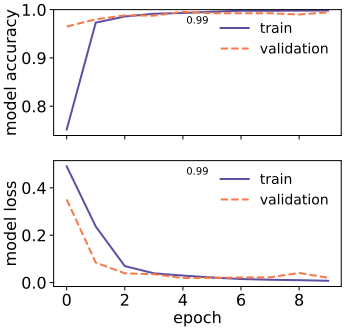

In [11]:
model = keras.Sequential(
[
    layers.Dense(10,input_shape=(900,),activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(4,activation='relu'),
    layers.Dense(2,activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#training
batch_size=64
epochs=10

training_history={}
training_history['Dropout']= model.fit(x_train,y_train_hot,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid,y_valid_hot))

# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score=model.evaluate(x_valid,y_valid_hot, verbose=0);

#accuracy
ax[0].plot(training_history['Dropout'].history['accuracy'], color=colors[0])
ax[0].plot(training_history['Dropout'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'validation'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

#loss
ax[1].plot(training_history['Dropout'].history['loss'], color=colors[0])
ax[1].plot(training_history['Dropout'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'validation'], loc='best')
ax[1].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[1].transAxes)


In [23]:
T_1, a_1=Tval[::400],x[::400]
accuracies=np.empty(T_1.shape)
for i in range(len(T_1)):
    accuracies[i] = model.evaluate(x[i*400:(i+1)*400:1], keras.utils.to_categorical(y[i*400:(i+1)*400:1]), 2)[1]

200/200 [==============================] - 0s 814us/step - loss: 8.7301 - accuracy: 1.0000


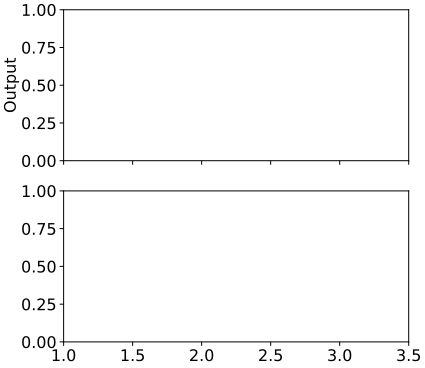

In [24]:
a_1=model.predict(a_1)

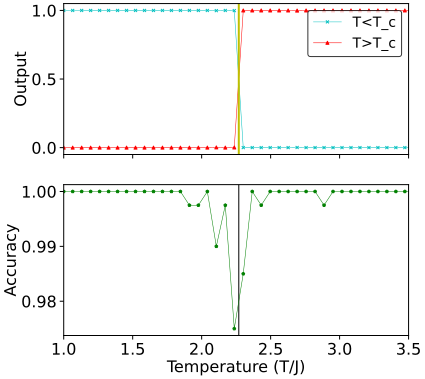

In [29]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(6,6))
ax[0].set_xlim(1.0,3.5)
ax[1].set_xlim(1.0,3.5)

ax[0].set_ylabel('Output')
ax[0].plot(T_1,a_1[:,0],'cx-',linewidth=0.5,markersize=3)
ax[0].plot(T_1,a_1[:,1],'r^-',linewidth=0.5,markersize=3)
ax[0].legend(['T<T_c', 'T>T_c'], loc='best',edgecolor='black',frameon=True)

cutoff=2/math.log(1+2**.5)
ax[0].axvline(cutoff,color='y')

ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Temperature (T/J)')
ax[1].axvline(cutoff,color='black',linewidth=1)
ax[1].plot(T_1, accuracies,'gp-',linewidth=0.5,markersize=3)